In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np

import matplotlib.pyplot as plt


heatfile='/Users/irffanalahi/Research/Research_update/SM/leukoref/somefigures/BL450noneu_all_matrix_intwith_blleukog50_hypo_bg_pos.txt'
phenfile='/Users/irffanalahi/Research/Research_update/SM/leukoref/somefigures/pblBLUnoneuPHENOCLASS.txt'


heatdf=pd.read_csv(heatfile,sep="\t",index_col=['chrom','start','end']) ##################
heatdf.head()

aS01BHIA1_mono.bw.bedgraph_rolled  \
chrom start    end                                           
chr1  1222700  1222702                               0.934   
      2296720  2296722                               0.977   
      6294947  6294949                               1.000   
      9721209  9721211                               0.986   
      10211665 10211667                              0.030   

                         aS01E03A1_mono.bw.bedgraph_rolled  \
chrom start    end                                           
chr1  1222700  1222702                               0.971   
      2296720  2296722                               0.941   
      6294947  6294949                               1.000   
      9721209  9721211                               0.962   
      10211665 10211667                              0.308   

                         aS01MAPA1_mono.bw.bedgraph_rolled  \
chrom start    end                                           
chr1  1222700  1222702                               1.000   
      2296720  2296722                               1.000   
      6294947  6294949                               1.000   
      9721209  9721211                               0.913   
      10211665 10211667                              0.130   

                         bNBC_NC11_41_naiveb.bw.bedgraph_rolled  \
chrom start    end                                                
chr1  1222700  1222702                                    1.000   
      2296720  2296722                                    0.929   
      6294947  6294949                                    1.000   
      9721209  9721211                                    0.976   
      10211665 10211667                                   1.000   

                         bS017RE51_memb.bw.bedgraph_rolled  \
chrom start    end                                           
chr1  1222700  1222702                               0.988   
      2296720  2296722                               0.963   
      6294947  6294949                               1.000   
      9721209  9721211                               0.965   
      10211665 10211667                              0.943   

                         bS01ECGA1_naiveb.bw.bedgraph_rolled  \
chrom start    end                                             
chr1  1222700  1222702                                 1.000   
      2296720  2296722                                 0.971   
      6294947  6294949                                 0.920   
      9721209  9721211                                 0.960   
      10211665 10211667                                1.000   

                         cS008H151_CD4.bw.bedgraph_rolled  \
chrom start    end                                          
chr1  1222700  1222702                              0.962   
      2296720  2296722                              0.235   
      6294947  6294949                              0.990   
      9721209  9721211                              0.938   
      10211665 10211667                             1.000   

                         cS009W451_CD4.bw.bedgraph_rolled  \
chrom start    end                                          
chr1  1222700  1222702                              1.000   
      2296720  2296722                              0.200   
      6294947  6294949                              0.968   
      9721209  9721211                              0.939   
      10211665 10211667                             1.000   

                         dC00256A1bs_CD8.bw.bedgraph_rolled  \
chrom start    end                                            
chr1  1222700  1222702                                0.821   
      2296720  2296722                                1.000   
      6294947  6294949                                0.912   
      9721209  9721211                                0.500   
      10211665 10211667                               1.000   

                         dC003VO55_CD8.bw.bedgraph_rolled  \
chrom s

In [2]:
phendf=pd.read_csv(phenfile,sep="\t",index_col=0,header=None)
phendf.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,,,,,,,,,,,,
CD14,1,1,1,2,2,2,2,2,2,2,2,2,2,2
CD19,2,2,2,1,1,1,2,2,2,2,2,2,2,2
CD4,2,2,2,2,2,2,1,1,2,2,2,2,2,2
CD8,2,2,2,2,2,2,2,2,1,1,1,2,2,2
CD56,2,2,2,2,2,2,2,2,2,2,2,1,1,1


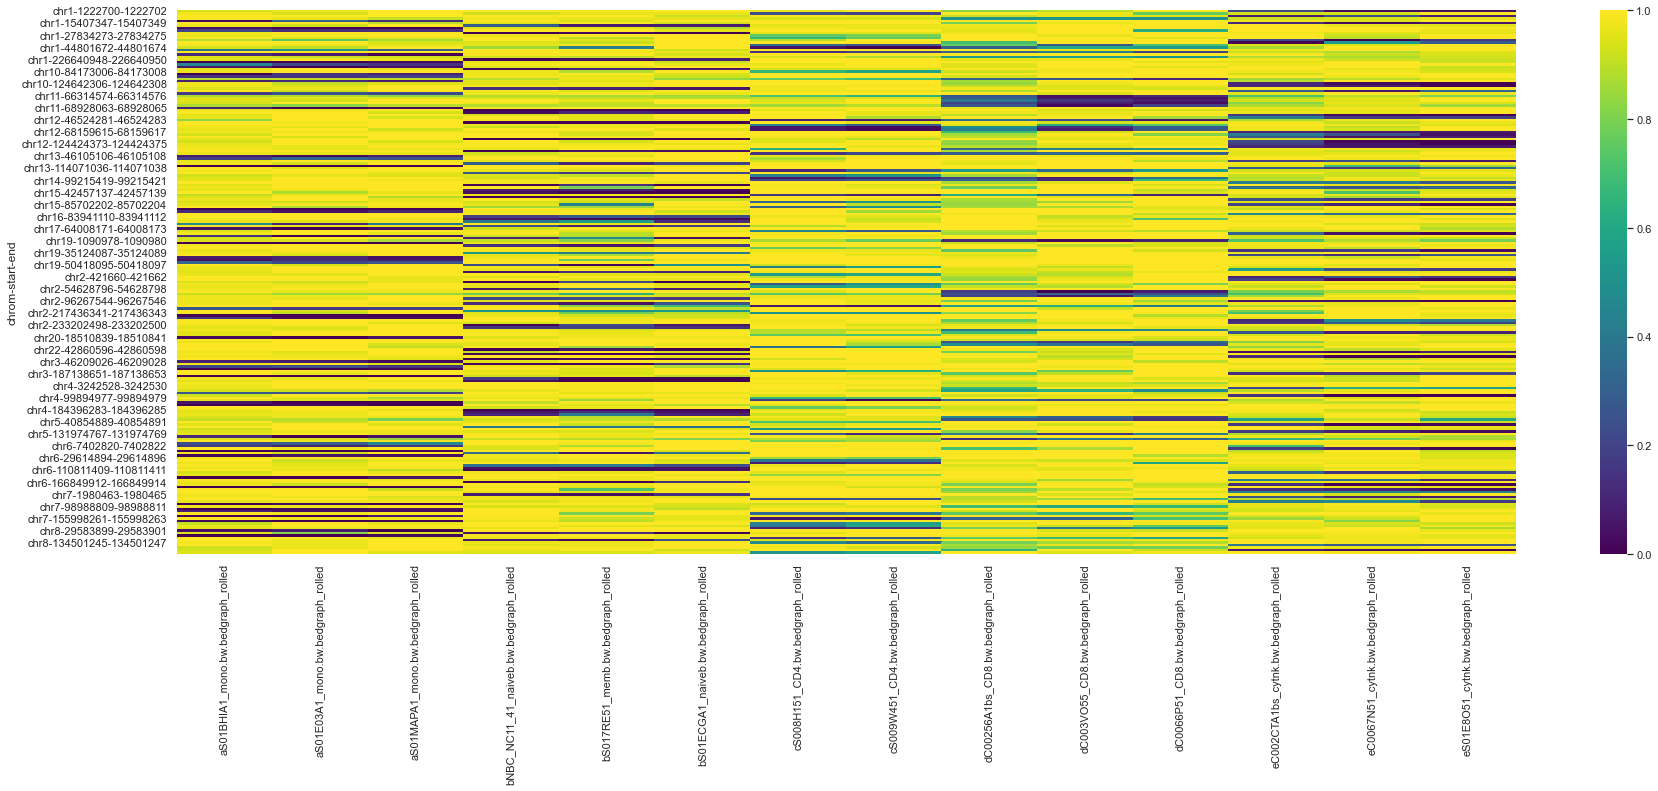

In [3]:
plt.figure(figsize=(30,10))
mycmap = plt.cm.viridis
mycmap.set_bad("dimgrey")

aaa=sns.heatmap(heatdf, cmap=mycmap)
cell_ticks = aaa.get_xticks()
phendf_T = phendf.transpose()
idx_lst = []
label_lst = []
for col in phendf_T.columns:
    col_vals = list(phendf_T[col])
    col_vals.reverse()
    idx = col_vals.index(1)
    count = col_vals.count(1)
    real_idx = len(col_vals) - idx - 1
    if count % 2 == 0:
        idx1 = real_idx - int(count / 2)
        idx2 = idx1 + 1
        label_lst.append((cell_ticks[idx1] + cell_ticks[idx2]) / 2)
    else:
        count -= 1
        count /= 2
        label_lst.append(cell_ticks[real_idx - int(count)])
    idx_lst.append(len(col_vals) - idx)
idx_lst = idx_lst[:-1]

In [4]:
max_val = 0.6

def get_mean_val(df, idx1, idx2, row_name):
    vals = []
    for name in list(df.columns[idx1:idx2]):
        vals.append(float(df[name][row_name]))
    return float(np.mean(vals))

def get_col_vals(df, idx1, idx2):
    cell_vals = []
    for chr_pos in list(df.index):
        cell_vals.append((chr_pos, get_mean_val(df, idx1, idx2, chr_pos)))
    return cell_vals

def find_correct_index(cell_vals):
    values = list(zip(*cell_vals))[1]
    for i in range(0, len(values)):
        if values[i] > max_val:
            return i
    return -1

def diagonal(df, idx_lst):
    idx_lst.insert(0, 0)
    idx_names = []
    idx = 0
    for i in range(len(idx_lst) - 1):
        cell_vals = get_col_vals(df, idx_lst[i], idx_lst[i + 1])[idx:]
        cell_vals.sort(key = lambda x: x[1])
        idx_names[idx:] = list(zip(*cell_vals))[0]
        new_idx = find_correct_index(cell_vals)
        idx += new_idx
    
    return idx_names

index_names = diagonal(heatdf, idx_lst)
heatdf = heatdf.reindex(index_names)

heatdf

aS01BHIA1_mono.bw.bedgraph_rolled  \
chrom start     end                                            
chr13 114069207 114069209                              0.000   
chr15 89166406  89166408                               0.000   
chr19 1155184   1155186                                0.000   
chr2  218214314 218214316                              0.000   
chr3  187969129 187969131                              0.000   
...                                                      ...   
chr6  29614894  29614896                               0.979   
      111750179 111750181                              0.939   
      122432416 122432418                              0.959   
      127346545 127346547                              0.000   
chr8  8374014   8374016                                0.023   

                           aS01E03A1_mono.bw.bedgraph_rolled  \
chrom start     end                                            
chr13 114069207 114069209                                0.0   
chr15 89166406  89166408                                 0.0   
chr19 1155184   1155186                                  0.0   
chr2  218214314 218214316                                0.0   
chr3  187969129 187969131                                0.0   
...                                                      ...   
chr6  29614894  29614896                                 1.0   
      111750179 111750181                                1.0   
      122432416 122432418                                1.0   
      127346545 127346547                                0.0   
chr8  8374014   8374016                                  0.0   

                           aS01MAPA1_mono.bw.bedgraph_rolled  \
chrom start     end                                            
chr13 114069207 114069209                              0.000   
chr15 89166406  89166408                               0.000   
chr19 1155184   1155186                                0.000   
chr2  218214314 218214316                              0.000   
chr3  187969129 187969131                              0.000   
...                                                      ...   
chr6  29614894  29614896                               1.000   
      111750179 111750181                              0.970   
      122432416 122432418                              1.000   
      127346545 127346547                              0.062   
chr8  8374014   8374016                                0.000   

                           bNBC_NC11_41_naiveb.bw.bedgraph_rolled  \
chrom start     end                                                 
chr13 114069207 114069209                                   1.000   
chr15 89166406  89166408                                    1.000   
chr19 1155184   1155186                                     0.965   
chr2  218214314 218214316                                   0.966   
chr3  187969129 187969131                                   0.929   
...                                                           ...   
chr6  29614894  29614896                                    0.974   
      111750179 111750181                                   0.976   
      122432416 122432418                                   1.000   
      127346545 127346547                                   1.000   
chr8  8374014   8374016                                     0.968   

                           bS017RE51_memb.bw.bedgraph_rolled  \
chrom start     end                                            
chr13 114069207 114069209                              1.000   
chr15 89166406  89166408                               0.976   
chr19 1155184   1155186                                0.970   
chr2  218214314 218214316                              0.932   
chr3  187969129 187969131                              0.960   
...                                                      ...   
chr6  29614894  29614896                               1.000   
      111750179 111750181                             

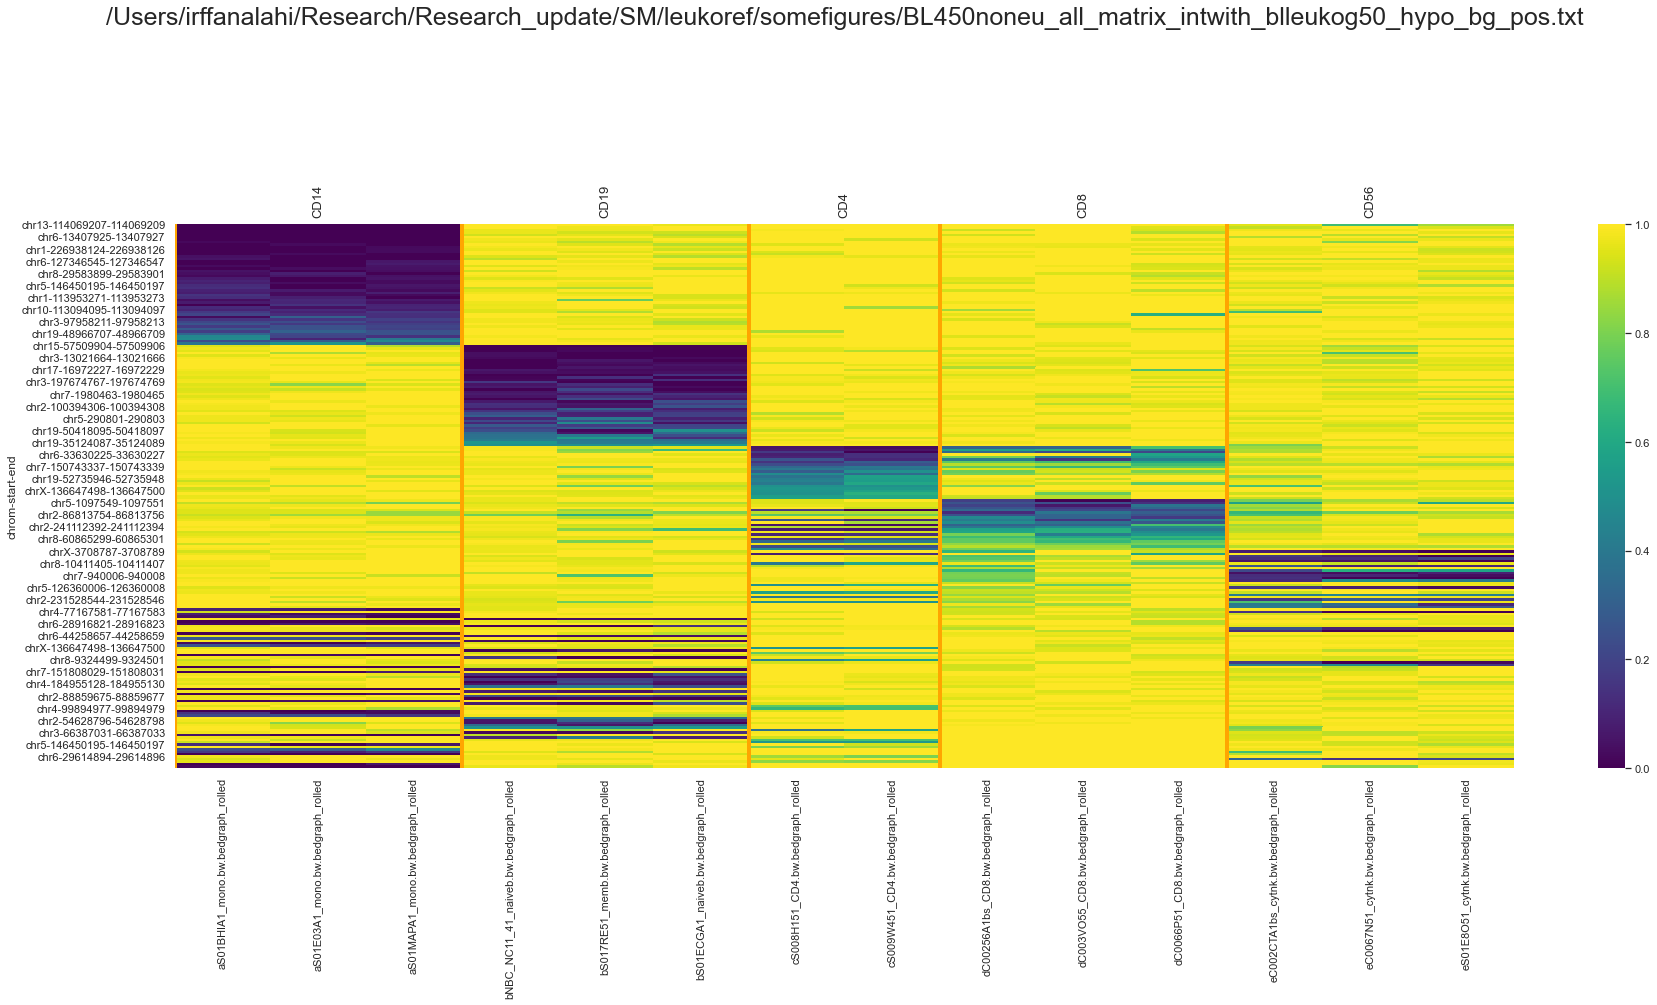

In [5]:
plt.figure(figsize=(30,10))
mycmap = plt.cm.viridis
mycmap.set_bad("dimgrey")

aaa=sns.heatmap(heatdf, cmap=mycmap)

plt.yticks(rotation=0)
plt.title(heatfile, fontsize=25, pad=200)
ymax, ymin = aaa.get_ylim()
for idx in idx_lst:
    aaa.axvline(x=idx, ymin=ymin, ymax=ymax, lw=4, color='orange')
for i, col in enumerate(phendf_T.columns):
    aaa.annotate(col, xy=(label_lst[i], 0.0), xytext=(0.0, 10), textcoords='offset points', fontsize=13, ha='center',rotation=90)
plt.savefig(heatfile + '_heatmap.pdf', bbox_inches='tight')